# Data Preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_path = '/kaggle/input/udemy-courses-dataset/UdemyCoursesDataset.csv'
df = pd.read_csv(data_path)
df

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
...,...,...,...,...,...,...,...,...,...,...,...
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,True,120,1566,29,36,All Levels,4 hours,2015-04-20T22:15:17Z,Web Development
3678,552700,Your Second Course on Piano: Two Handed Playing,True,70,1018,12,22,Beginner Level,5 hours,2015-10-26T20:04:21Z,Musical Instruments
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,True,40,723,130,37,All Levels,6.5 hours,2015-11-11T18:55:45Z,Web Development
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,False,Free,229,0,33,All Levels,2 hours,2017-05-26T16:45:55Z,Business Finance


In [5]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['year'] = df['published_timestamp'].dt.year

In [7]:
def parse_duration(x):
    try:
        if x == '0':
            return pd.to_timedelta(float(1),unit='m')
        if 'question' in x.lower():
            return pd.to_timedelta(float(x.replace(' questions', '')*1.5), unit='m')
        if 'hour' in x:
            x.replace(' hours', '')
            return pd.to_timedelta(float(x.replace(' hour', '')), unit='h')
        elif 'min' in x:
            return pd.to_timedelta(int(x.replace(' mins', '').replace(' min', '')), unit='m')
        return np.nan
    except:
        return pd.to_timedelta(float(1),unit='m')

df['duration'] = df['content_duration'].apply(parse_duration)
df['duration']

0      0 days 00:01:00
1      0 days 01:00:00
2      0 days 00:01:00
3      0 days 01:00:00
4      0 days 00:37:00
             ...      
3677   0 days 00:01:00
3678   0 days 00:01:00
3679   0 days 00:01:00
3680   0 days 00:01:00
3681   0 days 00:01:00
Name: duration, Length: 3682, dtype: timedelta64[ns]

In [8]:
df['price']=df['price'].replace({'Free':0})
df['price']=pd.to_numeric(df['price'])
df['price'].unique()

array([ 35,  75,  65, 200,  25, 100,  20,  40,  30,  45, 185, 120, 105,
        50,   0, 145,  55,  85, 110, 150,  95, 180, 125,  60,  90, 195,
        80,  70, 140, 190, 115, 130, 170, 175, 165, 135, 155, 160])

In [9]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,year,duration
count,3.682000e+03,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682
mean,6.766121e+05,66.010320,3194.230310,156.093156,40.065182,2015.432917,0 days 00:13:52.976643128
std,3.436355e+05,60.984167,9499.378361,934.957204,50.373299,1.185800,0 days 00:22:51.326539569
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,2011.000000,0 days 00:01:00
25%,4.078430e+05,20.000000,110.250000,4.000000,15.000000,2015.000000,0 days 00:01:00
50%,6.885580e+05,45.000000,911.500000,18.000000,25.000000,2016.000000,0 days 00:01:00
75%,9.617515e+05,95.000000,2540.250000,67.000000,45.000000,2016.000000,0 days 00:30:00
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,2017.000000,0 days 01:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3682 non-null   int64              
 1   course_title         3682 non-null   object             
 2   is_paid              3682 non-null   bool               
 3   price                3682 non-null   int64              
 4   num_subscribers      3682 non-null   int64              
 5   num_reviews          3682 non-null   int64              
 6   num_lectures         3682 non-null   int64              
 7   level                3682 non-null   object             
 8   content_duration     3682 non-null   object             
 9   published_timestamp  3682 non-null   datetime64[ns, UTC]
 10  subject              3682 non-null   object             
 11  year                 3682 non-null   int32              
 12  duration            

# Correlation

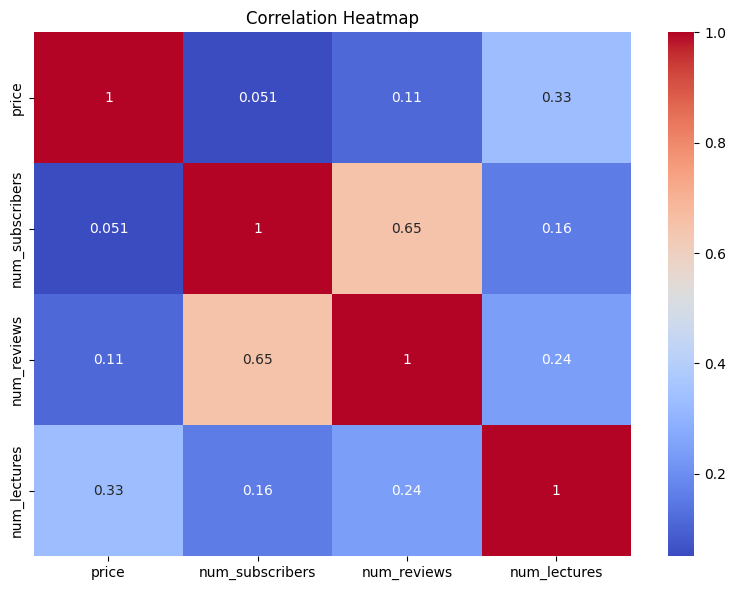

In [29]:
df_corr = df[['price', 'num_subscribers', 'num_reviews', 'num_lectures']].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# Descriptive Analysis

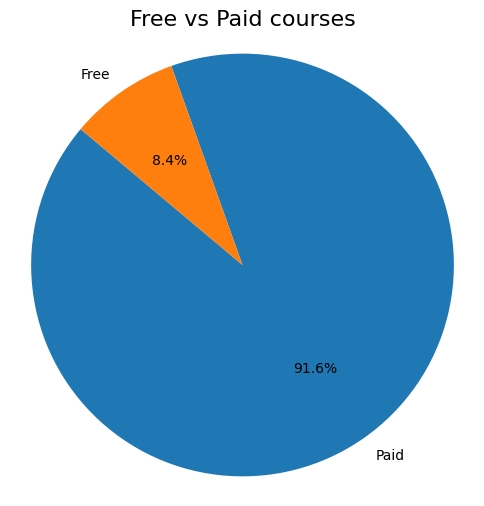

In [49]:
counts = df['is_paid'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=['Paid', 'Free'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Free vs Paid courses", fontsize=16)
plt.show()

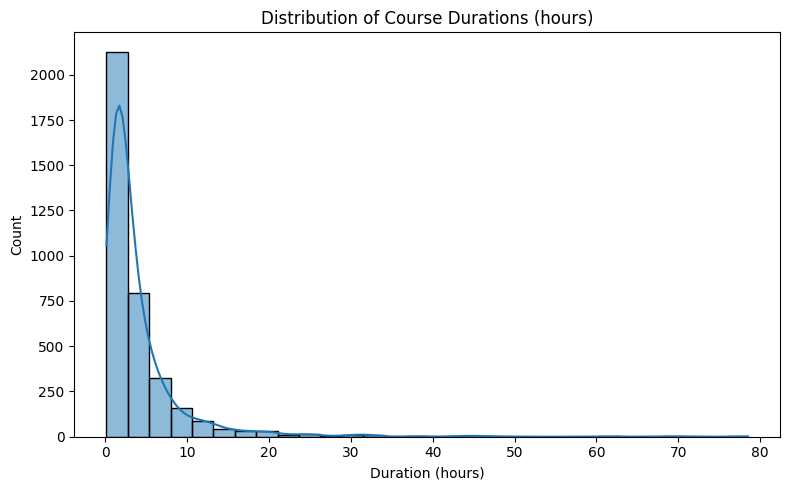

In [31]:
import regex as re
def parse_duration(val):
    if 'hour' in val:
        match = re.match(r'([\d.]+)\s*hour', val)
        return float(match.group(1)) if match else None
    elif 'min' in val:
        match = re.match(r'([\d.]+)\s*min', val)
        return float(match.group(1)) / 60 if match else None
    return None

df['duration_hours'] = df['content_duration'].apply(parse_duration)
df_clean = df.dropna(subset=['duration_hours'])

plt.figure(figsize=(8, 5))
sns.histplot(df_clean['duration_hours'], bins=30, kde=True)
plt.title("Distribution of Course Durations (hours)")
plt.xlabel("Duration (hours)")
plt.tight_layout()
plt.show()


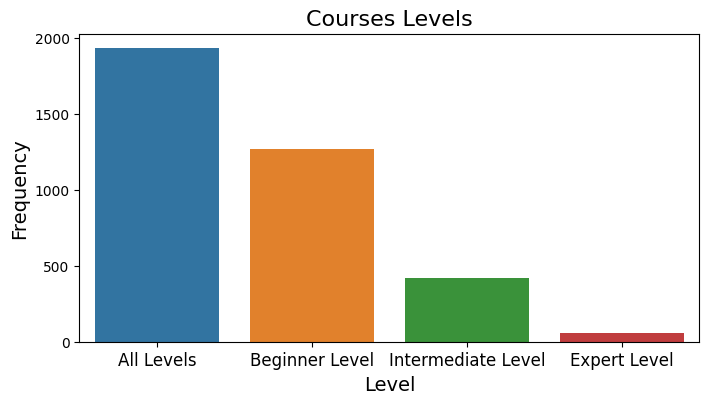

In [46]:
plt.figure(figsize=(8,4))
order = df['level'].value_counts().index
sns.countplot(data=df, x='level',  order=order)

plt.title("Courses Levels", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(range(0,2001,500))
plt.xlabel("Level", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

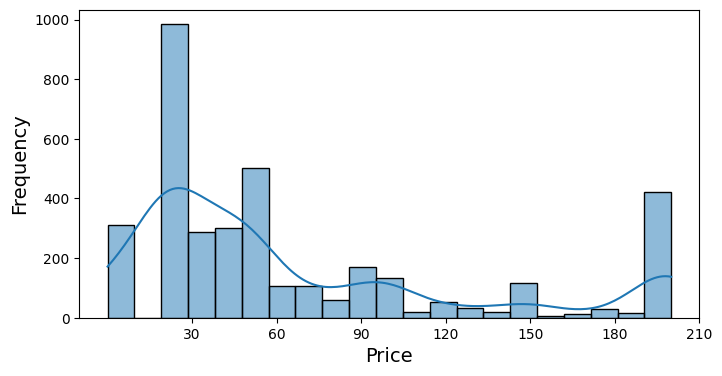

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='price', kde=True)

plt.xticks([30,60,90,120,150,180,210])
plt.xlabel("Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

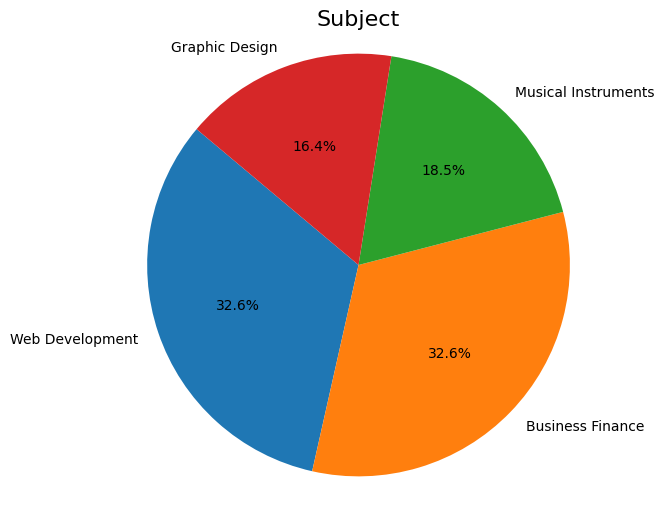

In [48]:
counts = df['subject'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Subject", fontsize=16)
plt.show()

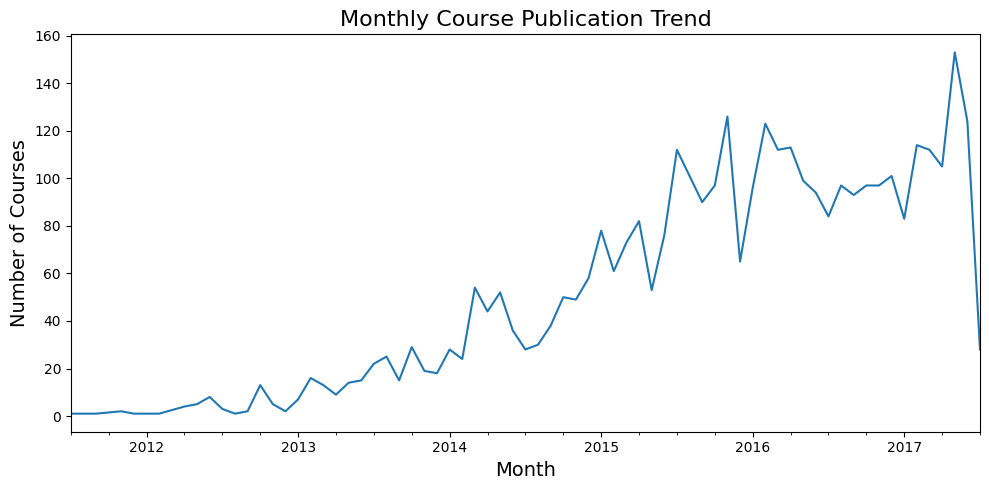

In [52]:
df['month'] = df['published_timestamp'].dt.to_period('M')
monthly_counts = df['month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
monthly_counts.plot()
plt.title("Monthly Course Publication Trend", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Courses", fontsize=14)
plt.tight_layout()
plt.show()


In [16]:
df['duration_minutes'] = df['duration'] % pd.Timedelta(hours=1)
df['duration_minutes'] = df['duration_minutes'].dt.seconds // 60

avg_duration = df['duration_minutes'].mean()
print(f"Average course duration: {avg_duration:.2f} Minutes")

Average course duration: 3.99 Minutes


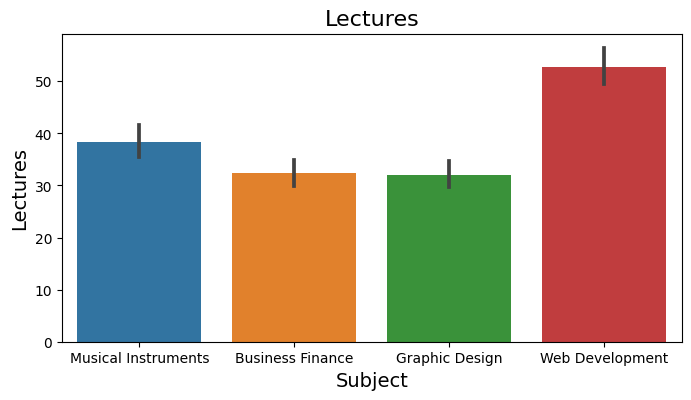

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='subject', y='num_lectures')

plt.title("Lectures", fontsize=16)
plt.xlabel("Subject", fontsize=14)
plt.ylabel("Lectures", fontsize=14)
plt.show()

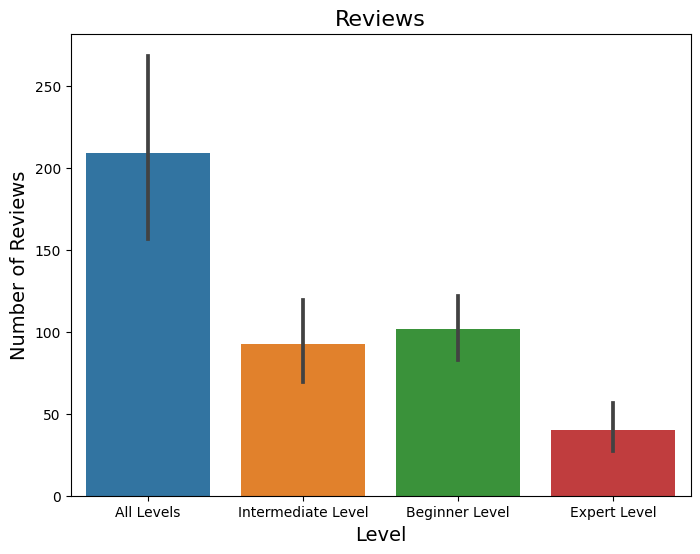

In [60]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, y='num_reviews', x='level')
plt.ylabel("Number of Reviews", fontsize=14)
plt.xlabel("Level", fontsize=14)
plt.title("Reviews", fontsize=16)
plt.show()

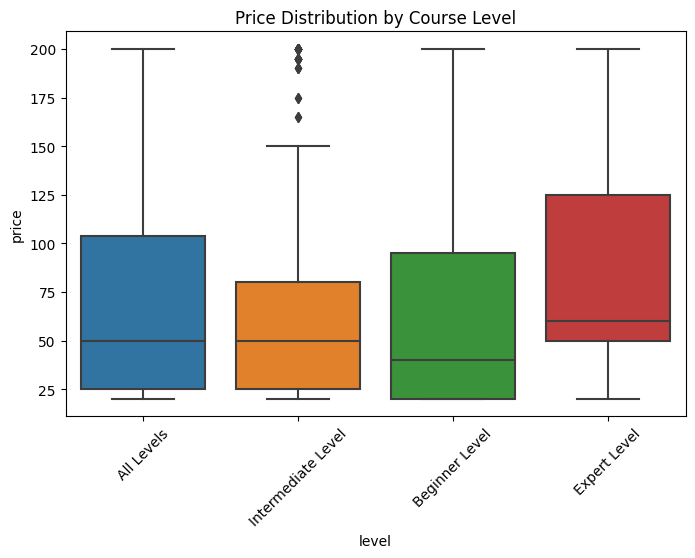

In [61]:
df_paid = df[df['is_paid'] == True].copy()
df_paid['price'] = pd.to_numeric(df_paid['price'], errors='coerce')

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_paid, x='level', y='price')
plt.title("Price Distribution by Course Level")
plt.xticks(rotation=45)
plt.show()
